# Book Genre Classification using Text Analysis in Python

This project classifies books into their respective genres based on book descriptions using machine learning techniques. It employs text preprocessing, TF-IDF vectorization, and machine learning models like Naive Bayes, Decision Tree, and Random Forest to predict book genres.


# 1. Importing Required Libraries

In this section, we import the necessary libraries for data processing, visualization, and machine learning:

- `pandas` for data manipulation.
- `matplotlib` and `seaborn` for data visualization.
- `wordcloud` for generating word clouds.
- `sklearn` for machine learning models, feature extraction (TF-IDF), and evaluation metrics.
- `imblearn` for handling class imbalance via SMOTE (Synthetic Minority Over-sampling Technique).
- `nltk` for text preprocessing including tokenization, stopword removal, and lemmatization.
- `joblib` for saving and loading models.
- `re` for regex-based text cleaning.

These libraries provide the tools for data analysis, model training, and evaluation.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import joblib
import re

# 2. Loading the Dataset

In this step, we load the dataset from a CSV file using `pandas`. The dataset contains book descriptions and their respective genres.

In [ ]:
# Load Dataset
df = pd.read_csv('961.csv')

# 3. Basic EDA (Exploratory Data Analysis)

### 3.1 Viewing the First Few Rows

We start by inspecting the first few rows of the dataset using `df.head()`. This provides a snapshot of the dataset, allowing us to check the structure and the first few entries.


In [3]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


### 3.2 Selecting Relevant Columns

Here, we select only the relevant columns from the dataset to simplify the analysis and model training. The chosen columns include book ID, title, author, rating, description, language, ISBN, genres, pages, publisher, publish date, number of ratings, and price. This helps focus on the key features required for genre classification.


In [4]:
df = df[['bookId', 'title', 'author', 'rating', 'description', 'language', 'isbn', 'genres', 'pages', 'publisher', 'publishDate', 'numRatings', 'price']]

### 3.3 Checking the Shape of the Dataset

We check the shape of the dataset to understand the number of rows and columns it contains. This gives us an idea of the dataset's size and whether it is suitable for model training or requires further preprocessing.


In [5]:
df.shape

(52478, 13)

### 3.4 Checking Dataset Information

We use `df.info()` to get detailed information about the dataset, including the number of non-null entries, column data types, and memory usage. This helps identify any missing values and understand the structure of the dataset.

This step is important for detecting potential issues that may need addressing during preprocessing.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bookId       52478 non-null  object 
 1   title        52478 non-null  object 
 2   author       52478 non-null  object 
 3   rating       52478 non-null  float64
 4   description  51140 non-null  object 
 5   language     48672 non-null  object 
 6   isbn         52478 non-null  object 
 7   genres       52478 non-null  object 
 8   pages        50131 non-null  object 
 9   publisher    48782 non-null  object 
 10  publishDate  51598 non-null  object 
 11  numRatings   52478 non-null  int64  
 12  price        38113 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


### 3.5 Refining `bookId` to Extract Numeric Values

In this step, we refine the `bookId` by extracting the numeric values from the column. The `bookId` is then converted to an integer type, ensuring that it represents only the numeric part and is consistent for further analysis.

This refinement helps maintain clean and standardized data for processing.


In [7]:
df['bookId'] = df['bookId'].astype(str).str.extract(r'^(\d+)')[0].astype(int)


### 3.6 Extracting the First Genre

In this step, we extract the first genre from the `genres` column. Since the genres are stored as strings that represent lists, we use `ast.literal_eval()` to safely evaluate the string into a list. Then, we select the first genre from the list. If the list is empty or if there's an error, `np.nan` is returned.

This transformation ensures that we focus on a single genre per book for classification purposes.


In [8]:
import ast
import numpy as np

def extract_first_genre(val):
    try:
        genres_list = ast.literal_eval(val) if isinstance(val, str) else val
        return genres_list[0] if genres_list else np.nan
    except:
        return np.nan

df['genre'] = df['genres'].apply(extract_first_genre)


### 3.7 Checking Genre Distribution

We use `df['genre'].value_counts()` to check the distribution of genres in the dataset. This helps us understand the frequency of each genre, allowing us to identify any imbalances in the dataset.

Analyzing the genre distribution is crucial for understanding the data before applying any machine learning models.


In [9]:
df['genre'].value_counts()

genre
Fiction                   6141
Fantasy                   5556
Romance                   3338
Young Adult               3145
Nonfiction                2564
                          ... 
Nobel Prize                  1
Asexual                      1
Love Inspired Suspense       1
Semiotics                    1
Sex Work                     1
Name: count, Length: 401, dtype: int64

### 3.8 Checking Language Distribution

We use `df['language'].value_counts()` to examine the distribution of languages in the dataset. This helps identify the variety of languages represented in the books and allows us to assess whether any language preprocessing is needed.

Understanding the language distribution is important for deciding whether to perform language-specific handling or filtering in the analysis.


In [10]:
df['language'].value_counts()

language
English                                  42661
Arabic                                    1038
Spanish                                    687
French                                     579
German                                     528
                                         ...  
Aromanian; Arumanian; Macedo-Romanian        1
Basque                                       1
Faroese                                      1
Iranian (Other)                              1
Norwegian Nynorsk; Nynorsk, Norwegian        1
Name: count, Length: 81, dtype: int64

### 3.9 Filtering Books in English

Here, we filter the dataset to include only books that are in the 'English' language. This step ensures that the analysis focuses solely on English books, simplifying the model training and improving performance, especially if the dataset includes multiple languages.

This filtering step helps maintain consistency in the data for genre classification.


In [ ]:
df = df[df['language'] == 'English']

### 3.10 Removing Rows with Null Descriptions

In this step, we remove rows where the `description` column contains null values (`NaN`). This ensures that we only work with books that have a valid description, which is crucial for text-based analysis.

By cleaning the data in this way, we ensure that the genre classification model is based on meaningful information.


In [ ]:
df = df[df['description'].notna()]

### 3.11 Removing Rows with Null Genres

In this step, we filter out rows where the `genre` column contains null values (`NaN`). This ensures that only books with a valid genre are included in the dataset, which is essential for genre classification tasks.

This cleaning step ensures that the target variable (genre) is not missing, allowing for effective model training.


In [ ]:
df = df[df['genre'].notna()]

### 3.12 Checking for Missing Values

We use `df.isnull().sum()` to check for any missing values in the dataset. This returns the count of missing (null) values for each column.

This step helps identify any columns that require further cleaning or imputation before proceeding with analysis and model training.


In [14]:
df.isnull().sum()

bookId            0
title             0
author            0
rating            0
description       0
language          0
isbn              0
genres            0
pages           915
publisher      1935
publishDate     273
numRatings        0
price          7417
genre             0
dtype: int64

### 3.13 Checking for Duplicate Rows

We use `df.duplicated().sum()` to check for any duplicate rows in the dataset. This returns the total number of duplicate rows, which helps us ensure that the dataset does not contain redundant information.

Removing duplicates is an essential step to maintain the quality and integrity of the data before analysis.

In [ ]:
df.duplicated().sum()

24

### 3.14 Dropping Duplicate Rows

In this step, we remove any duplicate rows from the dataset using `df.drop_duplicates()`. This ensures that each entry in the dataset is unique and avoids redundancy in the data, which could negatively impact the analysis and model performance.

By cleaning up duplicate rows, we ensure that the dataset is more representative of the underlying data distribution.


In [16]:
df = df.drop_duplicates()

### 3.15 Checking the Updated Shape of the Dataset

After cleaning the dataset (removing duplicates, handling missing values), we check the updated shape of the dataset using `df.shape`. This allows us to confirm the number of rows and columns after the data cleaning process.

This step helps verify that the cleaning operations have been applied correctly and gives an updated overview of the dataset's dimensions.


In [17]:
df.shape

(39545, 14)

### 3.16 Filtering Top 7 Genres

In this step:
1. We retrieve the top 7 most frequent genres using `df['genre'].value_counts().nlargest(7)`.
2. We then filter the dataset to include only those top 7 genres by using `df['genre'].isin(top_7_genres_counts.index)`. This ensures that our dataset focuses on the most common genres.
3. Finally, we display the counts of these top 7 genres.

This process allows us to focus the analysis on the most popular genres, ensuring more robust training data for classification.


In [18]:
# Step 1: Get top 8 genres with counts
top_7_genres_counts = df['genre'].value_counts().nlargest(7)

# Step 2: Filter the DataFrame to include only those top 8 genres
df = df[df['genre'].isin(top_7_genres_counts.index)].reset_index(drop=True)

# Step 3: Display the counts
print(top_7_genres_counts)


genre
Fiction               4987
Fantasy               4854
Young Adult           2891
Romance               2824
Nonfiction            2118
Historical Fiction    1952
Mystery               1816
Name: count, dtype: int64


### 3.17 Visualizing the Top 7 Genres

In this step, we create a bar plot to visualize the top 7 genres based on their counts. The plot is generated using `df['genre'].value_counts().nlargest(7)` and `matplotlib`:

- The plot is customized with a specific figure size (`figsize=(10, 5)`), color palette (`plt.cm.tab10.colors`), and black edges for the bars.
- The title, axis labels, and grid lines are added for better clarity and readability.
- We use `plt.xticks(rotation=45)` to rotate the x-axis labels for better visibility.

This visualization helps us understand the distribution of the most popular genres in the dataset.


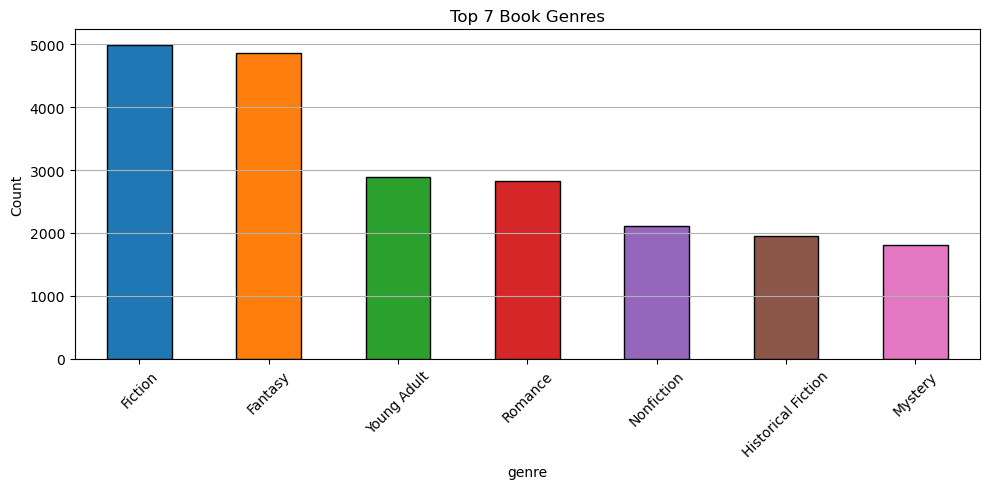

In [19]:
top_7 = df['genre'].value_counts().nlargest(7)
top_7.plot(kind='bar', figsize=(10, 5), color=plt.cm.tab10.colors, edgecolor='black')
plt.title('Top 7 Book Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 3.18 Rechecking Dataset Information

We use `df.info()` again to recheck the dataset after filtering and visualizing the top genres. This step gives us an updated overview of the dataset's structure, including the number of non-null entries, column data types, and memory usage.

Rechecking the dataset's information ensures that the cleaning and filtering processes have not introduced any issues.


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21442 entries, 0 to 21441
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bookId       21442 non-null  int32  
 1   title        21442 non-null  object 
 2   author       21442 non-null  object 
 3   rating       21442 non-null  float64
 4   description  21442 non-null  object 
 5   language     21442 non-null  object 
 6   isbn         21442 non-null  object 
 7   genres       21442 non-null  object 
 8   pages        20985 non-null  object 
 9   publisher    20451 non-null  object 
 10  publishDate  21326 non-null  object 
 11  numRatings   21442 non-null  int64  
 12  price        17587 non-null  object 
 13  genre        21442 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 2.2+ MB


### 3.19 Viewing the First Few Rows After Dropping and Filtering

After dropping duplicates and filtering for the top 7 genres, we use `df.head()` to view the updated dataset. This step helps ensure that the cleaning process, including the removal of duplicates and irrelevant genres, has been successfully applied.

By inspecting the first few rows, we verify that the dataset is now in its final, clean state and ready for further analysis or model training.


In [21]:
df.head()

,bookId,title,author,rating,description,language,isbn,genres,pages,publisher,publishDate,numRatings,price,genre
0,2767052,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,Scholastic Press,09/14/08,6376780,5.09,Young Adult
1,2,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,Scholastic Inc.,09/28/04,2507623,7.38,Fantasy
2,41865,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,"Little, Brown and Company",09/06/06,4964519,2.1,Young Adult
3,19063,The Book Thief,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...",552,Alfred A. Knopf,03/14/06,1834276,3.8,Historical Fiction
4,11127,The Chronicles of Narnia,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...",767,HarperCollins,09/16/02,517740,NaN,Fantasy


# 4. Preprocessing

In this section, we perform several preprocessing tasks to clean and prepare the dataset for model training. These tasks include calculating word counts, visualizing the text data, and ensuring the dataset is ready for further analysis.

### 4.1 Word Count Calculation and Word Cloud Visualization

1. We calculate the word count for each book description by applying the function `lambda x: len(str(x).split())` to the `description` column. This creates a new column, `word_count`, which contains the number of words in each description.
   
2. We generate a word cloud from the descriptions using the `WordCloud` class, where the word cloud visually represents the most frequent words across all descriptions.

This step helps explore the most common themes in the descriptions before we proceed to further model training and analysis.


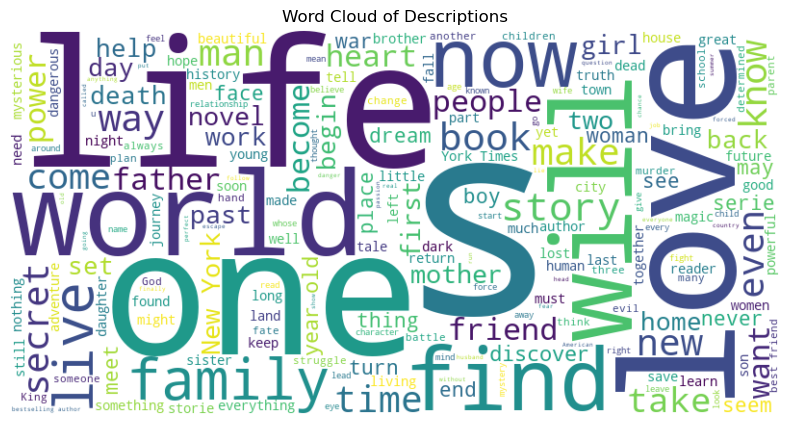

In [22]:
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['description'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

### 4.2 Defining Stopwords

In this step, we define a set of stopwords that will be removed from the book descriptions during preprocessing. The `stopwords.words('english')` provides a list of common English stopwords, which we combine with a set of custom stopwords specifically chosen for this dataset. These custom stopwords are words that are frequently used in the descriptions but don't contribute significant meaning to the classification task.

Removing stopwords helps reduce noise in the text data, allowing the model to focus on more meaningful words for genre classification.


In [23]:
stop_words = set(stopwords.words('english'))
# Define custom stopwords
custom_stopwords = {
    'reader', 'note', 'cover', 'original', 'series', 'dickens', 'shakespeare', 'betsy',
    'london', 'paris', 'victorian', 'century', 'christmas', 'white', 'would', 'every',
    'back', 'men', 'make', 'go', 'get', 'edition', 'introduction', 'english', 'text',
    'three', 'published', 'full', 'historical', 'family', 'work', 'friend', 'war', 'like',
    'tell', 'woman', 'whose', 'love', 'young', 'mother', 'father', 'must', 'world', 'man',
    'novel', 'year', 'life', 'one', 'story', 'new', 'time', 'book', 'first', 'find', 'two',
    'author', 'come', 'even', 'american', 'take', 'set', 'day', 'also', 'secret', 'know',
    'way', 'want', 'thing', 'truth', 'past', 'best', 'help', 'home', 'school', 'city',
    'place', 'people', 'always', 'might', 'seem', 'everything', 'live', 'old', 'dream',
    'volume', 'chapter'
}


### 4.3 Text Preprocessing Function: Lemmatization and Stopword Removal

We define a function `preprocess_text` that processes the text data by:
1. **Tokenizing** the text into individual words and converting it to lowercase.
2. **Lemmatizing** each word using the `WordNetLemmatizer` to reduce words to their base or root form (e.g., "running" becomes "run").
3. **Removing stopwords** using the default English stopwords from `nltk` and applying the custom stopwords defined earlier.

This function returns the cleaned text as a string of lemmatized words, ready for further analysis or model input.


In [24]:
def preprocess_text(text, custom_stopwords):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(str(text).lower())  # Convert to lowercase and tokenize
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]  # Lemmatization and stopword removal
    words = [word for word in words if word not in custom_stopwords]  # Apply custom stopwords
    return ' '.join(words)

### 4.4 Applying Text Preprocessing

In this step, we apply the `preprocess_text` function to the `description` column. We first drop any missing values using `dropna()`, and then preprocess each description by:
- Converting text to lowercase
- Tokenizing the text
- Lemmatizing the words
- Removing both default and custom stopwords

The cleaned descriptions are stored in a new column `Processed_Description`, which will be used for further analysis and model training.


In [25]:
# Apply text preprocessing
df['Processed_Description'] = df['description'].dropna().apply(lambda x: preprocess_text(x, custom_stopwords))

### 4.5 TF-IDF Feature Extraction

In this step, we use the `TfidfVectorizer` to convert the `Processed_Description` column into numerical features suitable for machine learning models. The `TfidfVectorizer` performs the following:
- It tokenizes the text and converts it into a matrix of TF-IDF features.
- The `max_features=10000` parameter limits the number of features to the top 10,000 most important terms.
- The `ngram_range=(1,3)` parameter captures unigrams, bigrams, and trigrams to account for word combinations.

The resulting features are stored in `X`, and the target variable (`genre`) is stored in `y` for model training.


In [26]:
# TF-IDF Feature Extraction
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
X = vectorizer.fit_transform(df['Processed_Description']).toarray()
y = df['genre']

### 4.6 Handling Class Imbalance using SMOTE

In this step, we use SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance in the dataset. The `SMOTE` technique generates synthetic samples for the minority classes to balance the class distribution.

- We apply `smote.fit_resample(X, y)` to the feature matrix `X` and target variable `y`, which resamples the dataset to ensure that each class has an equal number of samples.

This helps prevent the model from being biased towards the majority class and improves its performance on minority classes.


In [27]:
# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X, y = smote.fit_resample(X, y)

### 5.1 Train-Test Split

In this step, we split the dataset into training and testing sets using `train_test_split` from `sklearn`:
- The `test_size=0.2` parameter specifies that 20% of the data will be used for testing, while 80% will be used for training.
- The `stratify=y` parameter ensures that the class distribution is preserved in both the training and testing sets.

This ensures that the model is trained on a representative sample of the data and allows us to evaluate its performance on unseen data.


In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5.2 Model Training and Evaluation

In this step, we define and train three different models: 
- **Naïve Bayes**: A simple probabilistic classifier.
- **Decision Tree**: A tree-based model with a maximum depth of 10.
- **Random Forest**: An ensemble of decision trees with 200 estimators and a maximum depth of 10.

For each model:
1. We train it using `model.fit(X_train, y_train)`.
2. We make predictions on the test set using `model.predict(X_test)`.
3. We evaluate the model's accuracy using `accuracy_score` and generate a classification report for performance metrics such as precision, recall, and F1-score.
4. We also calculate the confusion matrix to visualize classification performance.

The function returns the trained models, their accuracies, and confusion matrices for further analysis.


In [29]:
# Train and evaluate models
def train_models(X_train, y_train, X_test, y_test):
    models = {
        "Naïve Bayes": MultinomialNB(alpha=0.5),
        "Decision Tree": DecisionTreeClassifier(max_depth=10),
        "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10)
    }
    accuracies = {}
    conf_matrices = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)
        conf_matrices[name] = confusion_matrix(y_test, y_pred)
        
        print(f"\n {name} Accuracy: {accuracies[name]:.4f}")
        print(classification_report(y_test, y_pred))
    
    return models, accuracies, conf_matrices

models, accuracies, conf_matrices = train_models(X_train, y_train, X_test, y_test)


 Naïve Bayes Accuracy: 0.8074
                    precision    recall  f1-score   support

           Fantasy       0.83      0.80      0.81       997
           Fiction       0.73      0.61      0.67       997
Historical Fiction       0.79      0.84      0.82       997
           Mystery       0.88      0.91      0.89       998
        Nonfiction       0.86      0.89      0.88       998
           Romance       0.81      0.82      0.81       997
       Young Adult       0.74      0.79      0.76       998

          accuracy                           0.81      6982
         macro avg       0.81      0.81      0.81      6982
      weighted avg       0.81      0.81      0.81      6982


 Decision Tree Accuracy: 0.3694
                    precision    recall  f1-score   support

           Fantasy       0.69      0.27      0.39       997
           Fiction       0.19      0.75      0.31       997
Historical Fiction       0.64      0.23      0.34       997
           Mystery       0.68   

### 5.3 Visualizing Confusion Matrices

In this step, we visualize the confusion matrices for each trained model. The confusion matrix shows the performance of the classification models by displaying the counts of true positives, false positives, true negatives, and false negatives.

For each model, we:
- Use `sns.heatmap` to plot the confusion matrix with annotations for better readability.
- Set the color map to 'Blues' for a clean and intuitive view.

This visualization helps in understanding where the models are making classification errors and provides insights into their performance across different classes.


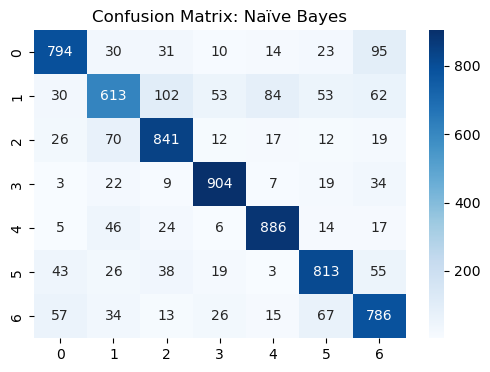

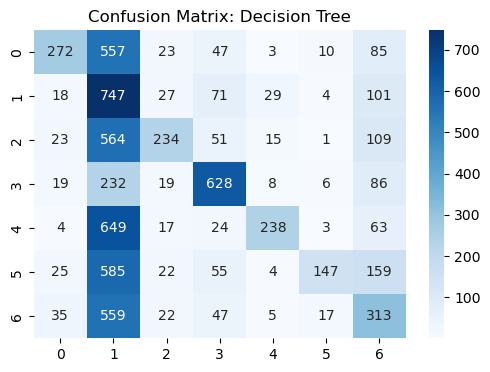

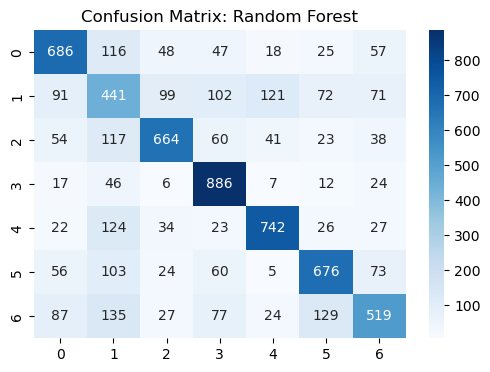

In [30]:
for name, matrix in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

### 5.4 Visualizing Train and Test Accuracies

In this step, we visualize the training and testing accuracies of each model to check for overfitting or underfitting. We:
1. Calculate the training accuracy for each model using `model.score(X_train, y_train)` and store it in the `train_accuracies` dictionary.
2. Use `plt.bar` to create a bar plot comparing the training and testing accuracies for each model.

This visualization allows us to compare how well each model performs on both the training and testing sets, helping us identify potential overfitting (high training accuracy, low test accuracy) or underfitting (low accuracy on both).


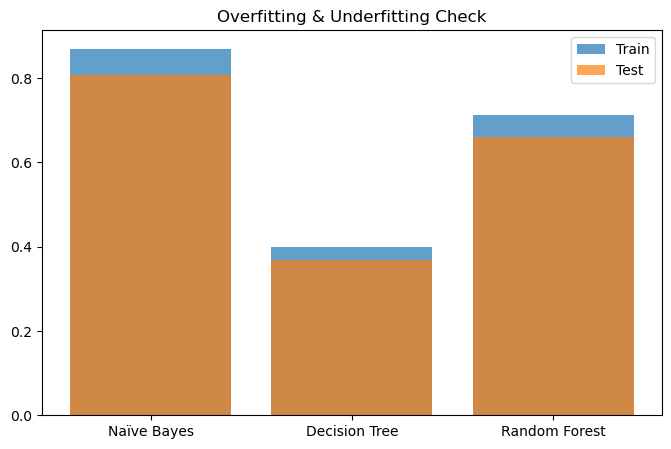

In [31]:
train_accuracies = {name: model.score(X_train, y_train) for name, model in models.items()}
plt.figure(figsize=(8, 5))
plt.bar(train_accuracies.keys(), train_accuracies.values(), alpha=0.7, label='Train')
plt.bar(accuracies.keys(), accuracies.values(), alpha=0.7, label='Test')
plt.title('Overfitting & Underfitting Check')
plt.legend()
plt.show()

### 5.5 Training and Testing Accuracy Comparison

In this step, we compare the training and testing accuracies of each model using a grouped bar chart:
1. **Training accuracy** is represented by the blue bars.
2. **Testing accuracy** is represented by the orange bars.

We adjust the bar width (`bar_width = 0.25`) to avoid overlap between the bars for each model. The x-axis labels are rotated for better visibility of the model names.

This comparison helps in assessing whether the models are overfitting or underfitting based on their performance on the training and testing data.


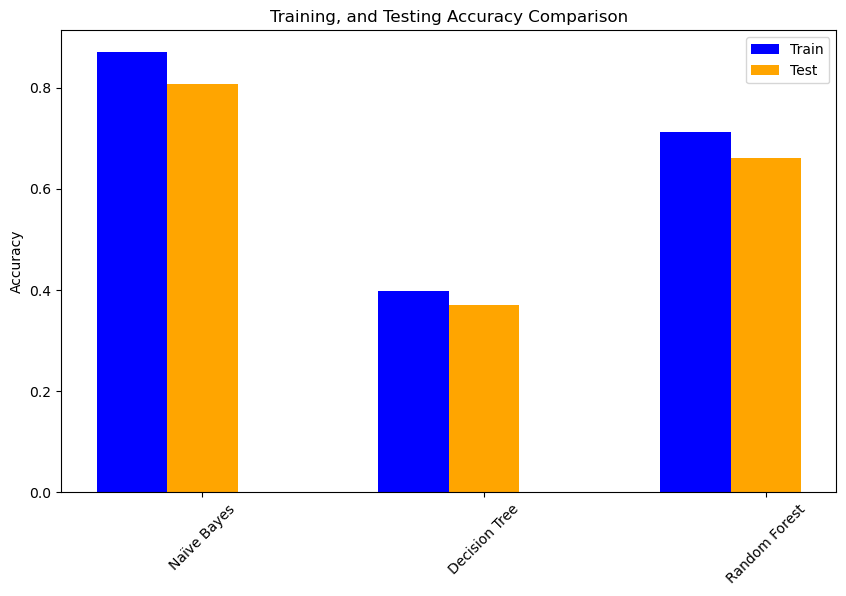

In [32]:
plt.figure(figsize=(10, 6))

bar_width = 0.25
models_list = list(models.keys())

# Training accuracy
train_acc_values = [train_accuracies[model] for model in models_list]
plt.bar(np.arange(len(models_list)), train_acc_values, bar_width, label='Train', color='blue')

# Testing accuracy
test_acc_values = [accuracies[model] for model in models_list]
plt.bar(np.arange(len(models_list)) + bar_width, test_acc_values, bar_width, label='Test', color='orange')

# Labels & Formatting
plt.xticks(np.arange(len(models_list)) + bar_width, models_list, rotation=45)
plt.ylabel("Accuracy")
plt.title("Training, and Testing Accuracy Comparison")
plt.legend()
plt.show()


### 5.6 Identifying and Saving the Best Model

In this step, we identify the best-performing model based on the highest testing accuracy. The model with the highest accuracy is selected using `max(accuracies, key=accuracies.get)`, and the corresponding model instance is retrieved.

The best model is then saved to a `.pkl` file using `joblib.dump`, allowing us to later load the model for predictions or further analysis.

This ensures that the best model is stored for future use, making it easy to deploy or test on new data.


In [33]:
# Identify and save the best model
best_model = max(accuracies, key=accuracies.get)
best_model_instance = models[best_model]
model_filename = f"{best_model.lower().replace(' ', '_')}_model.pkl"
joblib.dump(best_model_instance, model_filename)
print(f"\n{best_model} model saved successfully as {model_filename}.")


Naïve Bayes model saved successfully as naïve_bayes_model.pkl.


### 5.7 Saving the Trained TF-IDF Vectorizer

In this step, we save the trained TF-IDF vectorizer to a `.pkl` file using `joblib.dump`. This allows us to reuse the vectorizer for transforming new data in the future without needing to retrain it.

The saved vectorizer is crucial for converting new text data into the same feature format as the training data, ensuring consistency in model predictions.

The vectorizer is stored with the filename `tfidf_vectorizer.pkl`, and a success message is printed once it's saved.


In [34]:
# Save the trained TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("TF-IDF Vectorizer saved successfully.")

TF-IDF Vectorizer saved successfully.


### 5.8 Loading the Best-Selected Model for Prediction

In this step, we load the previously saved best-performing model using `joblib.load(model_filename)`. This allows us to use the model for making predictions on new, unseen data without needing to retrain it.

The loaded model is ready for inference, ensuring we can apply it directly to new inputs for genre classification.


In [35]:
# Load the best-selected model for prediction
loaded_model = joblib.load(model_filename)

### 6. Feature Importance Analysis (Naïve Bayes)

In this step, we analyze the feature importance for the Naïve Bayes model by examining the log-probabilities of the features (words) for each genre. If the loaded model is a `MultinomialNB` model, we:
1. Retrieve the feature names using `vectorizer.get_feature_names_out()`.
2. Extract the feature log-probabilities from the model using `loaded_model.feature_log_prob_`.

We create a DataFrame `genre_words` that shows the log-probabilities for each genre and word. Then, for each genre, we display the top 100 most important words based on the log-probabilities.

This analysis helps identify the words that are most influential for predicting each genre, providing valuable insights into the model's decision-making process.


In [36]:
#  FEATURE IMPORTANCE ANALYSIS (Naïve Bayes)

if isinstance(loaded_model, MultinomialNB):
    feature_names = vectorizer.get_feature_names_out()
    log_probs = loaded_model.feature_log_prob_

    genre_words = pd.DataFrame(log_probs, columns=feature_names, index=loaded_model.classes_)

    top_n = 100  # Number of top words per genre
    for genre in loaded_model.classes_:
        print(f"\nTop {top_n} Words for Genre: {genre}")
        print(genre_words.loc[genre].nlargest(top_n))


Top 100 Words for Genre: Fantasy
magic       -5.722569
power       -5.922902
king        -6.105778
dragon      -6.132555
land        -6.140793
               ...   
discovers   -7.126376
son         -7.132727
york        -7.139375
forest      -7.139973
ally        -7.141930
Name: Fantasy, Length: 100, dtype: float64

Top 100 Words for Genre: Fiction
child          -6.507920
tale           -6.571306
writer         -6.590335
wife           -6.599025
character      -6.645460
                  ...   
bestselling    -7.361725
relationship   -7.366474
rich           -7.367618
childhood      -7.369433
behind         -7.369441
Name: Fiction, Length: 100, dtype: float64

Top 100 Words for Genre: Historical Fiction
england   -6.195927
king      -6.275491
history   -6.309969
great     -6.454416
girl      -6.459866
             ...   
change    -7.165741
lead      -7.168353
may       -7.170707
north     -7.172053
return    -7.174992
Name: Historical Fiction, Length: 100, dtype: float64

Top 100 W

### 7. Splitting Training Data into Train and Validation Sets

In this step, we split the training data (`X_train` and `y_train`) into two parts:
1. **Training set (`X_train_final`, `y_train_final`)**: This is used for final model training.
2. **Validation set (`X_val`, `y_val`)**: This is reserved for model evaluation during training to monitor performance and prevent overfitting.

The split is done using `train_test_split`, with `test_size=0.2` indicating that 20% of the training data will be used for validation. The `stratify=y_train` ensures that the class distribution is preserved in both the training and validation sets.

This split enables better model validation and tuning during the training process.


In [37]:
# Split training data into train and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

### 7.1 Evaluating Training Accuracy

In this step, we evaluate the accuracy of the best model on the training set (`X_train_final` and `y_train_final`) by using `accuracy_score`. The accuracy score is calculated by comparing the model's predictions on the training data with the true labels.

We then print the training accuracy, which helps assess how well the model fits the training data.

This step allows us to check if the model is underfitting or overfitting during training.


In [38]:
# Evaluate Training Accuracy
train_acc = accuracy_score(y_train_final, best_model_instance.predict(X_train_final))
print(f"\nTraining Accuracy: {train_acc:.4f}")


Training Accuracy: 0.8706


In [39]:
# Evaluate Validation Accuracy
val_acc = accuracy_score(y_val, best_model_instance.predict(X_val))
print(f"Validation Accuracy: {val_acc:.4f}")

Validation Accuracy: 0.8677


### 7.2 Evaluating Validation Accuracy

In this step, we evaluate the accuracy of the best model on the validation set (`X_val` and `y_val`) using `accuracy_score`. The validation accuracy helps us assess the model's performance on data it hasn't seen during training.

We print the validation accuracy, which provides insights into how well the model generalizes to unseen data. A significant difference between training and validation accuracy could indicate overfitting or underfitting.

This step is crucial for monitoring the model's ability to generalize before final deployment.


In [40]:
# Evaluate Testing Accuracy
test_acc = accuracy_score(y_test, best_model_instance.predict(X_test))
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8074


### 7.3 Cross-Validation using 5 Folds

In this step, we perform cross-validation with 5 folds using the `cross_val_score` function from `sklearn`. Cross-validation helps evaluate the model's performance more robustly by splitting the training data into 5 subsets, training the model on 4 subsets, and validating it on the remaining one. This process is repeated for all subsets.

We print:
1. The individual cross-validation scores for each fold.
2. The mean cross-validation accuracy, which provides an overall estimate of the model's performance.

Cross-validation helps in detecting overfitting or underfitting and ensures that the model generalizes well across different subsets of the data.


In [41]:
# Cross-validation using 5 folds
cv_scores = cross_val_score(best_model_instance, X_train, y_train, cv=5, scoring="accuracy")
print(f"\nCross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.80236305 0.81686359 0.81378693 0.81110116 0.80734109]
Mean Cross-Validation Accuracy: 0.8103
